Name: Rakshanda Hedawoo  
Course: BUDT704  
Section: MB11  
Date: 6th October 2023

# Kickstarter's Fundraising Data Analysis
Kickstarter (https://www.kickstarter.com) campaigns make ideas into reality. It’s where creators share new visions for creative work with the communities that will come together to fund them.  
We have a kickstarter data with sample data of over 4000 kickstarter fundraising campaigns, having 13 columns that gives a summary of each campaign.

#### DataSet Structure:
1. **id (string)**  : Unique id for each record
1. **name (string)** : Name of the campaign 
1. **goal (string)** : Funding goal for the campaign 
1. **pledged (decimal)** : Total funds collected for the campaign in local currencies 
1. **state (string)** : Status of the campaign(successful, failed, canceled, suspended, live) 
1. **country (string)** : Country from where the project was enrolled 
1. **currency (string)** : Currency of the country 
1. **currency_trailing_code (bool)** : Whether currency has a prefix country code 
1. **staff_pick (bool)** : Whether the project was Staff picked by Kickstarter 
1. **backers_count (int)** : Number of people who provided the funds 
1. **static_usd_rate (decimal)** : Conversion rate into USD 
1. **usd_pledged (decimal)** : Total funds collected for the campaign in USD 
1. **category (string)** :  Category of art project 
1. **spotlight (bool)** : Whether the project was Featured on Kickstarter 

In [1]:
#Importing data analysis and visualization libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Getting data from csv file for analysis
def loadData(column_number,datatype='float'):
    return np.loadtxt('HW3_kickstarter.csv',dtype=datatype,skiprows=1, usecols=column_number, delimiter=',')

## Analysing Amount of pledges raised for Kickstarter projects
The main motive of these campaign's is fundraising for projects that bring value to the art domain. Let us analyse how much funds campaigns were able to raise.  
The descriptive statistics displayed below gives us an overview that out of 4184 projects, there were some projects that failed to get any funds with minimum pledge being 0.  
Further, the a particular campaign was able to gather the highest amount of pledge being around 110K dollars  
Finally, on an average the campaigns were able to collect funds around 1242 dollars. However, the pledges varied a lot depending on projects, hence the variation in amount was around 5K dollars.

In [3]:
#Load the amount pledged (in U.S. dollars) data across all projects.
amount_pledged = loadData(11)
amount_pledged

array([ 321.       ,  857.0681028, 4431.12     , ...,   50.       ,
        220.2370882,  155.       ])

In [4]:
#Analysing data on basic descriptive statistics
minimum_pledge_amt =2500
print('Total number of projects:',amount_pledged.size)
print('Minimum amount pledged:',amount_pledged.min())
print(f'Maximum amount pledged: {amount_pledged.max():.2f}')
print(f'Mean of amount pledged: {amount_pledged.mean():.2f}')
print(f'Median of amount pledged: {np.median(amount_pledged):.2f}')
print(f'Standard Deviation of amount pledged: {amount_pledged.std():.2f}')

filtered_pledges = ((amount_pledged[amount_pledged>=minimum_pledge_amt]).size/amount_pledged.size)*100
print(f'{filtered_pledges:.2f}% of projects were able to get funds of at least $2500.')

Total number of projects: 4184
Minimum amount pledged: 0.0
Maximum amount pledged: 111111.77
Mean of amount pledged: 1242.12
Median of amount pledged: 90.00
Standard Deviation of amount pledged: 5177.93
10.59% of projects were able to get funds of at least $2500.


## Analysing Category of Kickstarter projects
Being able to know how much pledges were raised does not give us context on which type of projects pledges were raised. For that purpose let us look at the different categories of the project.  
**There are 5 categories of projects:**
* Ceramics
* Conceptual Art  
* Digital Art
* Illustration
* Painting

In [5]:
category_data = loadData(12,'str')
#determining categories of project
unique_categories = np.unique(category_data)
unique_categories

array(['Ceramics', 'Conceptual Art', 'Digital Art', 'Illustration',
       'Painting'], dtype='<U14')

In [6]:
#determining how many projects Kickstarter supports based on their category
category_frequency = []
category_percentage = []

for i in range(0,unique_categories.size):
    x = np.array(np.where(category_data == unique_categories[i])).size
    category_frequency.append(x)
    category_percentage.append((x/category_data.size)*100)
    
print('Number of projects in each actegory:',category_frequency)
print('Percentage of projects for each category: ',category_percentage)


Number of projects in each actegory: [204, 879, 1054, 461, 1586]
Percentage of projects for each category:  [4.875717017208412, 21.008604206500955, 25.191204588910132, 11.018164435946463, 37.90630975143404]


### Let us have a look at the snapshot of proportion of projects for each category



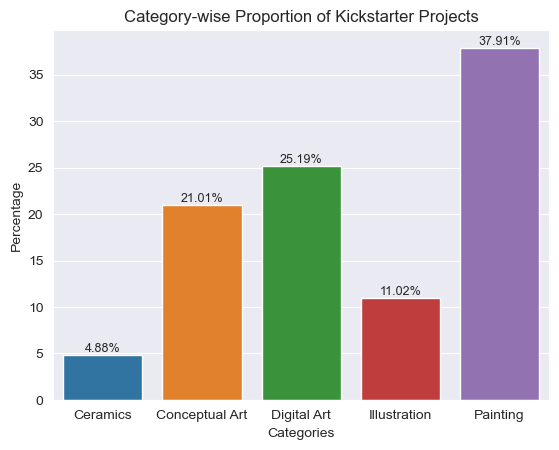

In [7]:
#visualizing above data to get a clear picture
sns.set_style('darkgrid')
category_barchart_title = 'Category-wise Proportion of Kickstarter Projects'
category_barchart_axes = sns.barplot(x=unique_categories, y=category_percentage,)
category_barchart_axes.set(xlabel = 'Categories', ylabel = 'Percentage')
category_barchart_axes.set_title(category_barchart_title)

#formatting and labelling the chart
for bar, percentage in zip(category_barchart_axes.patches, category_percentage):
    text_x = bar.get_x() + bar.get_width() / 2.0
    text_y = bar.get_height()
    text = f'{percentage:.2f}%'
    category_barchart_axes.text(text_x, text_y, text, fontsize=9, ha='center', va='bottom')

## Inference:
1. From the bar graph it is evident that 37.91% of campaigned projects at Kickstarter were Paintings, followed by Digital Art at 25.19%, Conceptual Art at 21.01%, and Illustration at 11.02%.
1. However, only 4.8% of Ceramics projects were supported by Kickstarter in fundraising. This might be the case due a possible reason that paintings are more durable and easy to create, as compared to fragile and complicated ceramic art works.
1. On the contary, as Digital arts are more easy to maintain as compared to paintings, still the number of digital art projects is less than paintings. This might be because majority of people are still equiped with older ways of painting and do not have much knowledge on how technology can be used to make art.
1. Therefore, technology related arts like illustrations are also minority in number. 
1. Finally, Conceptual art works are realted to ideas and innovation with the help of which an artist creates the artpiece. Assuming the effort and complexity of this art, not many artist would create their art in this category, due to which the proportion of this project category is low.

## Analysing States of Kickstarter Projects
Now that we have the context behind what are the different types of projects Kickstarter supports and how much pledges it raised, lets see what happens to those projects next.  
After a campaign raises funds for the project, based on whether a campaign met their objective or not they are further categorized as:
* **Successful** : campaigns that successfully raised amount equal to or greater than the goal fund
* **Failed** : campaigns that failed to raise funds
* **Suspended** : campaigns that did not get many people to raise funds
* **Canceled** : campaigns that were canceled 
* **Live** : ongoing campaigns that are currently raising the funds


In [8]:
project_states_data = loadData(4,'str')
distinct_project_states = np.unique(project_states_data)
distinct_project_states

array(['canceled', 'failed', 'live', 'successful', 'suspended'],
      dtype='<U10')

In [9]:
#Combining category and project states data to analyse together
category_and_prjstates_data = np.vstack((category_data, project_states_data))

#Analysing successful projects 
successfulprj_categorywise = []

for i in range(0,category_data.size):
    if(category_and_prjstates_data[1][i] == distinct_project_states[3]): #states[3] = successful
        successfulprj_categorywise.append(category_and_prjstates_data[0][i])

#Analysing successful project categorywise
success_categorywise_count = np.zeros(unique_categories.size)

for category in successfulprj_categorywise:
    if(category == unique_categories[0]): #Ceramics
        success_categorywise_count[0]+=1
    elif(category == unique_categories[1]):  #Conceptual Art
        success_categorywise_count[1]+=1
    elif(category == unique_categories[2]):  #Digital Art
        success_categorywise_count[2]+=1
    elif(category == unique_categories[3]):   #Illustration
        success_categorywise_count[3]+=1
    elif(category == unique_categories[4]):   #Paintings
        success_categorywise_count[4]+=1

#Calculating percentage of success rate to determine which category was the most successful
success_categorwise_prop = np.where(success_categorywise_count>0.0,(success_categorywise_count/len(successfulprj_categorywise))*100,0.0)


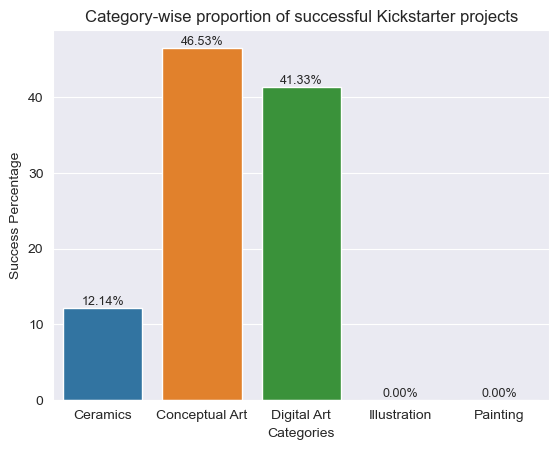

In [10]:
#making a visualization for understanding success ratio of project categorywise
sns.set_style('darkgrid')
state_barchart_title = 'Category-wise proportion of successful Kickstarter projects'
state_barchart_axes = sns.barplot(x = unique_categories, y = success_categorwise_prop)
state_barchart_axes.set(xlabel = 'Categories', ylabel = 'Success Percentage')
state_barchart_axes.set_title(state_barchart_title)

#formatting and labelling the chart
for bar, percentage in zip(state_barchart_axes.patches, success_categorwise_prop):
    text_x = bar.get_x() + bar.get_width() / 2.0
    text_y = bar.get_height()
    text = f'{percentage:.2f}%'
    state_barchart_axes.text(text_x, text_y, text, fontsize=9, ha='center', va='bottom')

## Inference:
1. Firstly, the most successful project category was Conceptual Art and the least successful project categories were Illustration and Painting.
1. Earlier as we saw, majority of the projects were under Paintings, despite of having such large number of projects the success rate of Painting category is 0!
1. This implies, majority of the Kickstarter projects that come under Paintings and illustrations either failed to raise the goal fund or were canceled/suspended from Kickstarter's side or the project owner's side.
1. Looking at this, Kickstarter should make some decision on whether to remove the Paintings and illustration category from their enrollment, as people are not genuinely inetersted in raising funds for those kind of projects.
1. Finally, conceptual art category is the winner here because though the proportion of it's category was less, the value that these masterpieces bring is much higher than any of these art forms. Hence, majority of people were willing to raise funds for these projects which led to higher success rate.

## Analysing Staff Picked v/s SpotLight Kickstarter Projects
Now that we know how many successful campaigns were organized by Kickstarters, let us now see how many of them got featured on Kickstarter's website and which were the projects that were selected by the staff of Kickstarters. 



In [11]:
staff_pick_data = loadData(8,'str')
spotlight_data = loadData(13,'str')

#Converting string value into boolean to help analyse the data
staff_pick = np.where(staff_pick_data=='TRUE',True,False)
spotlight = np.where(spotlight_data=='TRUE',True,False)

In [12]:
#determining number of projects staffpicked v/s spotlight
number_staff_pick_projects = project_states_data[staff_pick]
number_spotlight_projects = project_states_data[spotlight]

print('Total number of staff picked projects:',number_staff_pick_projects.size)
print('Total number of Spotlight projects:',number_spotlight_projects.size)

Total number of staff picked projects: 224
Total number of Spotlight projects: 692


In [13]:
#success rate of each feature
successful_staff_pick_projects = ((number_staff_pick_projects[number_staff_pick_projects == 'successful']).size/number_staff_pick_projects.size)*100
successful_spotlight_projects = ((number_spotlight_projects[number_spotlight_projects == 'successful']).size/number_spotlight_projects.size)*100

print(f'Success rate of staff pick projects: {successful_staff_pick_projects:.2f}%')
print(f'Success rate of spotlight projects: {successful_spotlight_projects:.2f}%')

Success rate of staff pick projects: 72.77%
Success rate of spotlight projects: 100.00%



| Type of Project | Number of Total Projects | Number of Successful Projects | Success Rate |
| --- | --- | --- | --- |
| Staff Picked | 224 | 163 | 72.77% |
| Spotlight | 692 | 692 | 100.00 % |

## Inference:
* Spotlight projects are associated with a higher percentage of successful projects with success rate of 100%.
* The success rate of spotlight projects is higher because only the successful projects were featured on the website. However, the staff pick projects comprises of successful, failed, canceled and suspended states of projects. 
* As, it is not necessary that every project selected by Kickstarter's staff will be successful however, success rate depends on whether the campaign was able to collect equal or greater than the goal fund.
* The bifurcation of spotlight and staffpicked exists because, Kickstarter wants to showcase the higher number of successful projects on it's website under featured/spotlight section to attract more people in order to promote their ongoing campaigns.
* This also gives an illusion to the project owners that if they enroll in Kickstarter to get funds; their chances of getting funds will be higher as Kickstarters success rate is higher.  

## Analysing Projects Geographically
Now that we have analysed various categories of projects, their pledged amount, and different states along with their success rate, let's analyse further how projects are contributed globally.  
There are currently 17 countries contributing to the Kickstarter's platform by enrolling their projects for fundraising.

In [14]:
#Determining countries which contributed through their projects
country_data = loadData(5,'str')
print(np.unique(country_data))
print('Number of distinct countries:',np.unique(country_data).size)
country_project_stat_data = np.vstack((country_data,project_states_data))

country_project_success = {'AT':0, 'AU':0, 'BE':0, 'CA':0, 'CH':0, 'DE':0, 'DK':0, 'ES':0, 'FR':0, 'GB':0, 'IE':0,
       'IT':0, 'NL':0, 'NO':0, 'NZ':0, 'SE':0, 'US':0}

['AT' 'AU' 'BE' 'CA' 'CH' 'DE' 'DK' 'ES' 'FR' 'GB' 'IE' 'IT' 'NL' 'NO'
 'NZ' 'SE' 'US']
Number of distinct countries: 17


### Now that we have some data based on which countries are contributing, let us analyse it further on how many countries are enrolling projects that led to being successful.

In [15]:
#filtering successful projects countrywise
successful = np.array(np.where(country_project_stat_data[1] == 'successful',country_project_stat_data[0],0))
successful = successful[successful!='0']
print('Total number of successful projects:',successful.size)

for i in successful:
    country_project_success[i] +=1


Total number of successful projects: 692


In [16]:
#creating bucket of countries which have less number of successful projects for more clarifying results
minimum_project_number = 50
numbers_greater_100 = {key : values for key,values in country_project_success.items() if values>minimum_project_number}
numbers_lesser_100 = {key : values for key,values in country_project_success.items() if values<=minimum_project_number}

numbers_greater_100['Other'] = np.array(list(numbers_lesser_100.values())).sum()
countries = np.array(list(numbers_greater_100.keys()))
frequency = np.array(list(numbers_greater_100.values()))
print(countries)
print(frequency)


['GB' 'US' 'Other']
[ 56 594  42]


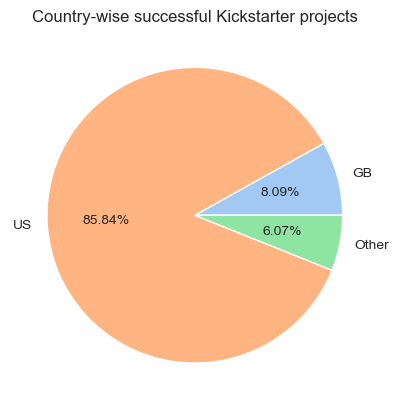

In [17]:
#creating pie chart to oversee the contribution of each country
data = frequency
labels = countries

#define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:5]

#create pie chart
plt.pie(data, labels = labels, colors = colors, autopct='%.2f%%')
plt.title('Country-wise successful Kickstarter projects')
plt.show()


## Inference:
1. To begin with, out of 4184 projects, 692 projects were successful; out of which 85.84% was contributed by United States.
1. From the remaining share, 8.09% was contributed by Great Britain and 6.07% was contributed by other countries.
1. One possible reason behind US being the major contributor can be; as Kickstarter is a US based company, it's primary target were artists residing in the US who are in need of fundings.
1. Once, Kickstarter was able to see good results from its campaigns in US, it then opened the platform for other countries to join and contribute. As United States got a head start with Kickstarter, they are leading in their contribution as compared to other countries.
1. Finally, Great Britain contributed around 2% more than 15 countries' combined contribution. This is an indicator that, in the coming years, there can be an exponential increase in the contribution of Great Britain.

"I pledge on my honor that I have not given nor received any unauthorized assistance on this assignment."  
--Rakshanda Hedawoo